#Feature Selection for IntruDTree

In [2]:
from common import rename_feature
import matplotlib.pyplot as plt
import pickle

In [17]:
selection = 11

<>:13: SyntaxWarning: invalid escape sequence '\D'
<>:13: SyntaxWarning: invalid escape sequence '\D'
/var/folders/p4/824j72wj45j6vl163c2r94940000gn/T/ipykernel_6579/1985342186.py:13: SyntaxWarning: invalid escape sequence '\D'
  a.set_title("$\Delta$ Gini Index", fontsize=10)


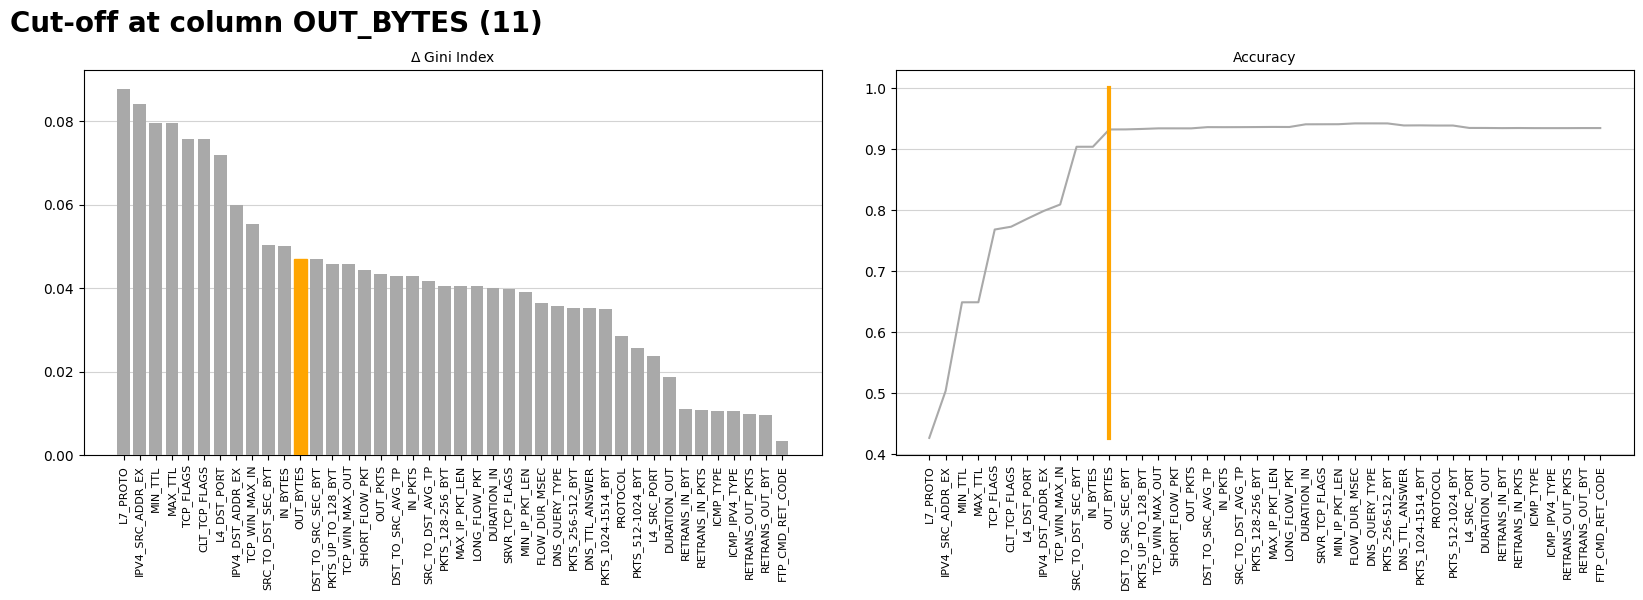

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5), sharey=False)

with open(f"../search/ranking.pkl", "rb") as file:
    result = pickle.load(file)

xs = result.index
deltas = result["Delta"]
scores = result["Score"]
plot_labels = [rename_feature(x) for x in result["Feature"]]


a = axes[0]
a.set_title("$\Delta$ Gini Index", fontsize=10)
barlist = a.bar(xs, deltas, zorder=3, color="darkgrey")
#barlist[selection[mod]].set_color('orange')
barlist[selection].set_color('orange')

a.set_xticks(xs, plot_labels, rotation='vertical')
a.xaxis.set_tick_params(labelsize=8)
a.grid(color='lightgray', axis="y", zorder=0)
a.text(-0.1, 1.1, "Cut-off at column OUT_BYTES (11)", transform=a.transAxes, size=20, weight='bold')

a = axes[1]
a.set_title("Accuracy", fontsize=10)
a.plot(xs, scores, color="darkgrey")
a.plot([selection]*2,[min(scores),1], zorder=3, color="orange", linewidth=3)
a.set_xticks(xs, plot_labels, rotation='vertical')
a.xaxis.set_tick_params(labelsize=8)
a.grid(color='lightgray', axis="y", zorder=0)

plt.subplots_adjust(wspace=0.1, hspace=0.6)
plt.savefig('../img/idtree_selection.png', bbox_inches='tight')